In [2]:
import pandas as pd
import numpy as np
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [5]:
data = pd.read_csv('imdb.csv')

In [6]:


# Verify the data structure (columns, first few rows)
print(data.columns)
print(data.head())



Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')
   Rank                    Title                     Genre  \
0     1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1     2               Prometheus  Adventure,Mystery,Sci-Fi   
2     3                    Split           Horror,Thriller   
3     4                     Sing   Animation,Comedy,Family   
4     5            Suicide Squad  Action,Adventure,Fantasy   

                                         Description              Director  \
0  A group of intergalactic criminals are forced ...            James Gunn   
1  Following clues to the origin of mankind, a te...          Ridley Scott   
2  Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3  In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4  A secret government agency recruits some of 

In [7]:
# Feature: 'Description' column (movie reviews)
# Target: 'Rating' column, for binary classification: 1 (positive) or 0 (negative)
X = data['Description']  # Assuming 'Description' contains the movie reviews (text)
y = data['Rating'].apply(lambda x: 1 if x >= 6 else 0)  # Convert Rating into binary sentiment (1 = good, 0 = bad)

In [8]:
# Vectorize the descriptions using CountVectorizer (or TfidfVectorizer for TF-IDF features)
vectorizer = CountVectorizer(max_features=10000)  # Limiting to 10,000 most frequent words
X_vectorized = vectorizer.fit_transform(X)

In [9]:
# Convert the sparse matrix to a dense numpy array
X_data = X_vectorized.toarray()

In [10]:
# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [11]:
# Build the neural network model
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)))  # Input layer
model.add(layers.Dense(16, activation='relu'))  # Hidden layer 1
model.add(layers.Dense(1, activation='sigmoid'))  # Output layer (sigmoid for binary classification)

In [12]:
# Compile the model
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.001),
    loss=losses.binary_crossentropy,  # Binary cross-entropy for binary classification
    metrics=[metrics.binary_accuracy]  # Accuracy metric
)

In [13]:
# Train the model using the training data, with validation set to monitor overfitting
history = model.fit(
    X_train,
    y_train,
    epochs=3,  # Train for 3 epochs to avoid overfitting
    batch_size=512,
    validation_data=(X_val, y_val)
)

Epoch 1/3
2/2 [==============================] - 2s 432ms/step - loss: 0.6972 - binary_accuracy: 0.4556 - val_loss: 0.6739 - val_binary_accuracy: 0.8375
Epoch 2/3
2/2 [==============================] - 0s 64ms/step - loss: 0.6715 - binary_accuracy: 0.8125 - val_loss: 0.6527 - val_binary_accuracy: 0.8500
Epoch 3/3
2/2 [==============================] - 0s 60ms/step - loss: 0.6463 - binary_accuracy: 0.8278 - val_loss: 0.6237 - val_binary_accuracy: 0.8500


In [14]:
# Plot the training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

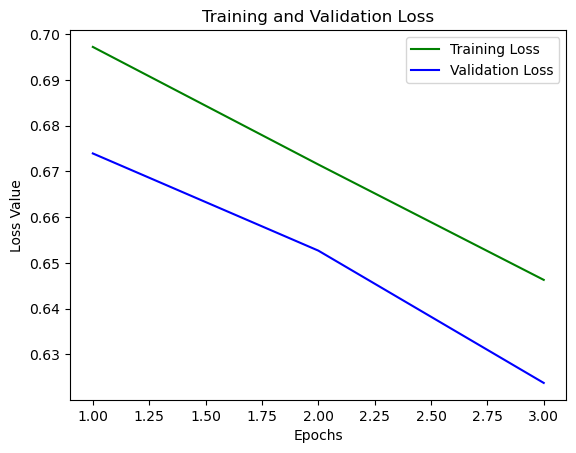

In [15]:
# Training and Validation Loss
plt.plot(epochs, loss_values, 'g', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

In [16]:
# Plot the training and validation accuracy
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

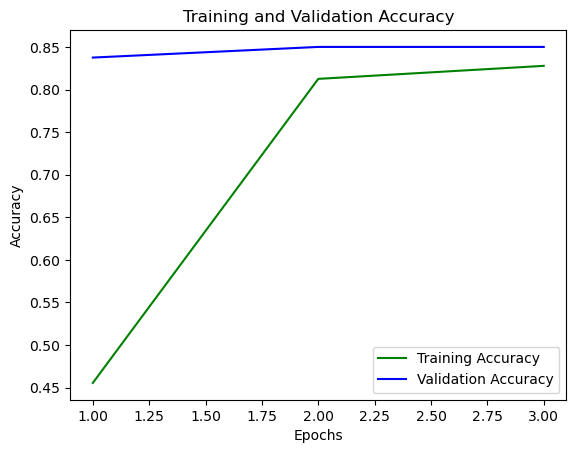

In [17]:
# Training and Validation Accuracy
plt.plot(epochs, acc_values, 'g', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'b', label="Validation Accuracy")
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [18]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss}")

7/7 [==============================] - 0s 4ms/step - loss: 0.6466 - binary_accuracy: 0.7700
Test accuracy: 0.7699999809265137
Test loss: 0.6465816497802734


In [19]:
# Make predictions on the test data
predictions = model.predict(X_test)

7/7 [==============================] - 0s 4ms/step


In [20]:


# Convert the predictions to binary (0 or 1)
y_pred = np.zeros(len(predictions))
for i, score in enumerate(predictions):
    y_pred[i] = np.round(score)



C:\Users\shripad\AppData\Local\Temp\ipykernel_21972\2828554724.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = np.round(score)


In [21]:
# Calculate the Mean Absolute Error (MAE) for the test predictions
mae = mean_absolute_error(y_pred, y_test)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 0.23
